# Is there evidence in Mori et al that DHA treatment raises LDL cholesterol more than EPA treatment? 

**Background:**  Recently Judge Miranda Du invalidated five patents held by Amarin inc. on the basis of obviousness. The question that lay at the heart of this trial was whether it was obvious that treatment with pure EPA would lower triglycerides without raising LDL cholesterol. Fish oil, which largely consists of two ingredients, EPA and DHA, has been known to lower triglyercides, but has recently been shown to be ineffective for lowering the risk of cardiovascular events.  In contrast, a recent trial, REDUCE-IT, found that 4g of pure EPA significantly lowered cardiovascular events when taken in combination with a statin.  The only substantive difference between the REDUCE-IT trial and a similar trial by AstraZeneca that failed was that the REDUCE-IT trial used pure EPA whereas the AstraZeneca trial treated patients with a mixture of omega 3 fatty acids that included DHA. Scientific consensus is that DHA raises LDL cholesterol, which causes an increase in cardiovascular event, canceling out the beneficial effects of EPA.

Amarin was granted several patents covering the use of pure EPA, and these patents were the basis of Amarin Inc. et. al versus Reddy Inc. et al.  Although fish oil had been shown to reduce triglyceride levels in patients prior to Amarin's filings, Amarin claimed novelty because it was not appreciated that pure EPA does not raise LDL levels while DHA does.  

Judge Du found that this invention is not novel, and critical to her reasoning was a paper published by Trevor Mori and colleagues, which she argues demonstrates that DHA raises LDL levels MORE (i.e. to a larger degree) than does EPA treatment.  But is that really what Mori shows?  We investigate that claim here.  


## The central question:  Does Mori demonstrate the DHA raises LDL levels more than EPA raises LDL levels?

The goal of this analysis is to answer a simple question.  Does the data in Mori support the claim that treatment with DHA raises LDL levels more than treatment with EPA.  In other words, we would like to know if, given the data in Mori, there is reason to believe that, $$ \Delta LDL_{DHA} > \Delta LDL_{EPA} $$ where $ \Delta LDL_{DHA} $ is the change in LDL levels upon DHA treatment (relative to the baseline) and $ \Delta LDL_{EPA} $ is the change in LDL levels upon EPA treatment. To formalize this question in the language of statistics, the null hypothesis is $$ \Delta LDL_{DHA}  <=  \Delta LDL_{EPA} $$ and we would like to see if we can reject this null, which we would do if the probability of the null hypothesis is less than 0.05.

## What are the data in Mori?

Mori et al. divided 59 middle aged men into 3 groups that each received a different treatment:  placebo (olive oil), DHA, EPA. They measured a number of different parameters, but the relevant parameter here is LDL levels.  The LDL levels at baseline and after treatment for each group are reported, and a linear regression model is used to estimate the mean $ \Delta LDL $ for each group.  Both the estimate of the mean is reported as is the standard error of the mean.  These estimates are reproduced below:

![Mori](img/Mori.png)

The first three columns represent the mean+/=SEMs of LDL levels for the three treatment groups (Placebo, EPA, DHA).  The last column is the estimate of the mean change in LDL (SEMs) for the EPA group and the DHA group. So what we see is that in the EPA group, LDL cholesterol changed by 0.15mmol/L, which is not statistically significantly different than baseline, whereas in the DHA group, LDL changed by 0.34mmol/L, which is statistically significant from baseline.   

These results are graphed in Figure 3 of Mori:

![MoriFig](img/Mori_figure.png)

At first glance then, the answer to our question seems simple.  DHA treatment causes a statistically significant change from baseline, wherease EPA treatment does not.  So it must be that $ \Delta LDL_{DHA} > \Delta LDL_{EPA} $.  However this logic is not correct.  All we can say is that DHA causes LDL levels to change so that they are statistically higher than baseline, whereas we cannot say with confidence that EPA causes a change that is higher than baseline.  But this does not mean that $ \Delta LDL_{DHA} > \Delta LDL_{EPA} $.  Why?  Well, imagine a scenario where you have two treatments, A and B, and they have the exact same effects on LDL cholesterol.  But you test the treatments in a small population (as was done in Mori), and it could be that, just by chance, the individuals that received treatment B had a bigger change in that particular population sample than the individuals that received treatment A.  Furthermore, that change was big enough to exceed the threshold of significance for treatment B but not for treatment A.  This is a scenario where you have two treatments that have the same effect on LDL but one is called "significant" (relative to baseline) where the other is not.  So to avoid this, if we want to make the claim that $ \Delta LDL_{DHA} > \Delta LDL_{EPA} $ we have to figure out some way to **directly** compare the two populations.  **Most importantly, one cannot infer (as Judge Du did) from the graph above, or from the data provided in Mori that DHA treatment causes a significantly larger mean change in LDL levels than EPA in the population.**  

Looking at the figure above,  it is noticable that BOTH groups show a change in LDL levels.  Is this change **between groups** statistically significant?  What if the difference between the two groups is just due to bad luck (i.e. sampling error). We cannot say for certain which case is true from the analyis presented in Mori et al because they did not directly test whether the change in LDL levels in the DHA group was significantly different that the change in the EPA group. 

## The standard error of the mean

While Mori et al did not do a direct comparison of the two groups, what they did do is perform a linear regression to estimate the mean change in LDL levels from baseline for each group.  Without the raw data, one cannot perform exactly the same type of analysis that they used to compare the groups.  But since they estimated the mean $ \Delta LDL_{DHA} $ and the mean $ \Delta LDL_{EPA} $, and importantly, they also reported the standard error of the mean for each group, we can ask if the data in Mori supports the idea that $ \Delta LDL_{DHA} > \Delta LDL_{EPA} $.

What Mori did was estimate the mean value of $ \Delta LDL_{DHA} $ based on their sample, and furthermore, they provided a measure of the error of this estimate. Specifically, they sampled from a population of individuals, treated that sample of people with DHA, measured the mean change in LDL levels, and from that sample mean, *estimated* what the mean change in LDL levels would have been had they treated the whole population. What is the actual population mean, $ \Delta LDL_{DHA} $? Well from the Central Limit Theorem, we know that it follows a normal distribution, centered at 0.34 mmol/L with a standard deviation of 0.14, which looks like this:

In [11]:
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math

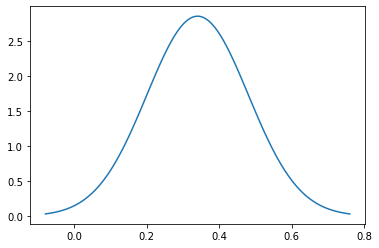

In [17]:
#plot the distribution of delta LDL (DHA)
fig, ax = plt.subplots()
mu = 0.34
sigma = 0.14
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

What does distribtion of the population mean of $ \Delta LDL_{EPA} $ look like in comparison?

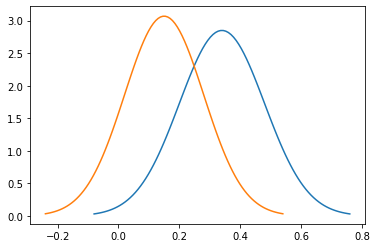

In [18]:
#plot the distribution of delta LDL (DHA)
fig, ax = plt.subplots()
mu = 0.34
sigma = 0.14
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
mu = 0.15
sigma = 0.13
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

We are finally in a position to test our null hypothesis, $$ \Delta LDL_{DHA}  <=  \Delta LDL_{EPA} $$ If we can reject this null, that is the p < 0.05, then Mori provides evidence that DHA raises LDL levels more than EPA does. If we cannot reject this null, the Mori does not provide such evidence.

The easiest way to test the null is to simulate the popluation means of $ \Delta LDL_{DHA} $ and $ \Delta LDL_{EPA} $ and then simply count how many times  $ \Delta LDL_{DHA}  <=  \Delta LDL_{EPA} $.

In [41]:
#Simulate 1000 draws from each normal distribution
#and compute the fraction of the time the estimate 
#for $ \Delta LDL_{DHA}  <=  \Delta LDL_{EPA} $.

mu_DHA = 0.34
sigma_DHA = 0.14
mu_EPA = 0.15
sigma_EPA = 0.13

test = [1 for x in list(np.random.normal(mu_EPA, sigma_EPA, 10000) - np.random.normal(mu_DHA, sigma_DHA, 10000)) if x >=0]
print(len(test)/10000)

0.1542


So p = 0.15 and we **cannot** reject the null hypothesis.  This means there is not good evidence in Mori et al that $ \Delta LDL_{DHA} $ is greater than $ \Delta LDL_{EPA} $